<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/Generating_texts_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the required libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Building the word vocabulary

In [3]:
# Define the lyrics of the song
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split('\n')
print(corpus)
print(f"\nThere are {len(corpus)} lines in the lyrics.")

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1 # add 1 for the index `0` which is just the padding token.

print(f"Word index dictionary: {tokenizer.word_index}")
print(f"Total words: {total_words}")

Word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

### Preprocessing the data

In [5]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Let's see the result for the first line of the song. The particular line and the expected token sequence is shown in the cell below:

In [6]:
# Get sample sentences
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

token_list = []
for word in sentence:
  token_list.append(tokenizer.word_index[word])

print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


### Build the model

In [9]:
# Build the model
model = Sequential([
          Embedding(total_words, 64, input_length=max_sequence_len-1),
          Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16832     
                                                                 
 bidirectional (Bidirection  (None, 40)                13600     
 al)                                                             
                                                                 
 dense (Dense)               (None, 263)               10783     
                                                                 
Total params: 41215 (161.00 KB)
Trainable params: 41215 (161.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [10]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
15/15 [==============================] - 10s 136ms/step - loss: 5.5686 - accuracy: 0.0199
Epoch 2/500
15/15 [==============================] - 1s 72ms/step - loss: 5.5426 - accuracy: 0.0309
Epoch 3/500
15/15 [==============================] - 1s 72ms/step - loss: 5.4821 - accuracy: 0.0287
Epoch 4/500
15/15 [==============================] - 1s 50ms/step - loss: 5.3142 - accuracy: 0.0199
Epoch 5/500
15/15 [==============================] - 1s 40ms/step - loss: 5.1411 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 18ms/step - loss: 5.0725 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 18ms/step - loss: 5.0254 - accuracy: 0.0530
Epoch 8/500
15/15 [==============================] - 0s 28ms/step - loss: 4.9912 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 1s 51ms/step - loss: 4.9569 - accuracy: 0.0618
Epoch 10/500
15/15 [==============================] - 0s 18ms/step - loss: 4.9185 - accuracy: 0.05

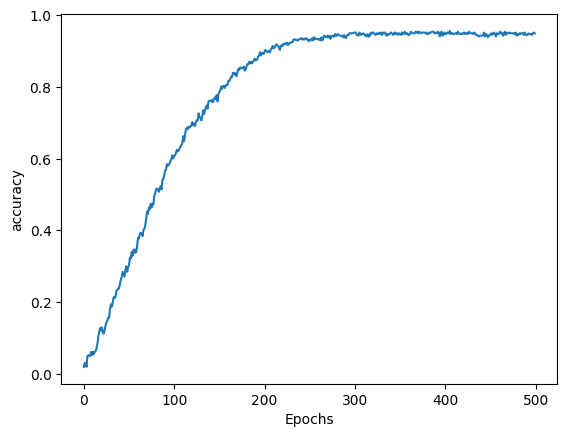

In [11]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

### Generating texts
With the model trained, we can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached.

In [24]:
seed_text = "Mary loves her cat"
next_words = 20
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1)
  probabilities = model.predict(token_list)
  predicted = np.argmax(probabilities, axis=-1)[0]
  # Ignore if index is 0 because that is just the padding.
  if predicted != 0:
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 22ms/step
Mary loves her cat cheeks at the same time as red as a rose rose cask cask bees swore friends were hearty odaly mavrone


In the output above, we notice frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. Basically, instead of getting the index with max probability, we will get the top three indices and choose one at random. This is not the most time efficient solution because it is always sorting the entire array even if you only need the top three.

In [25]:
seed_text = "Mary loves her cat"
next_words = 20
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1)
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
  predicted = np.argsort(probabilities)[0][-choice]
  # Ignore if index is 0 because that is just the padding.
  if predicted != 0:
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 27ms/step
Mary loves her cat cheeks the harp lanigans ball in time for ball ball for all entangled entangled entangled me jig me all relations
